In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

x_train = train.drop(columns=['hash','trajectory_id','x_exit','y_exit'])
x_test = test2.drop(columns=['hash','trajectory_id','x_exit','y_exit'])
y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814262 entries, 0 to 814261
Data columns (total 13 columns):
hash             814262 non-null object
trajectory_id    814262 non-null object
time_entry       814262 non-null int64
time_exit        814262 non-null int64
vmax             814262 non-null float64
vmin             814262 non-null float64
vmean            814262 non-null float64
x_entry          814262 non-null float64
y_entry          814262 non-null float64
x_exit           814262 non-null float64
y_exit           814262 non-null float64
x_req            814262 non-null float64
y_req            814262 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 80.8+ MB


In [4]:
test2[:10]

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,x_req,y_req
0,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_5,54212,54632,0.0,0.0,0.0,3.773118e+06,-1.914490e+07,NaN,NaN,3.773385e+06,-1.911344e+07
1,000479418b5561ab694a2870cc04fd43_25,traj_000479418b5561ab694a2870cc04fd43_25_10,55749,55856,0.0,0.0,0.0,3.769978e+06,-1.934136e+07,NaN,NaN,3.771380e+06,-1.933274e+07
2,000506a39775e5bca661ac80e3f466eb_29,traj_000506a39775e5bca661ac80e3f466eb_29_5,55568,55568,0.0,0.0,0.0,3.757468e+06,-1.923860e+07,NaN,NaN,3.755349e+06,-1.916135e+07
3,0005401ceddaf27a9b7f0d42ef1fbe95_1,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,56118,56525,0.0,0.0,0.0,3.760505e+06,-1.935500e+07,NaN,NaN,3.751349e+06,-1.916284e+07
4,00063a4f6c12e1e4de7d876580620667_3,traj_00063a4f6c12e1e4de7d876580620667_3_4,53647,54314,0.0,0.0,0.0,3.766319e+06,-1.917013e+07,NaN,NaN,3.776264e+06,-1.918289e+07
5,0006535be25bb52dd06983447880c964_5,traj_0006535be25bb52dd06983447880c964_5_12,55326,55326,0.0,0.0,0.0,3.776037e+06,-1.916993e+07,NaN,NaN,3.769801e+06,-1.935089e+07
6,0006f84bb33ec929d1cda7686f861d0a_31,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,54012,54012,0.0,0.0,0.0,3.760009e+06,-1.923361e+07,NaN,NaN,3.759835e+06,-1.924379e+07
7,00093ae562586aed0e053b8431e8ace4_23,traj_00093ae562586aed0e053b8431e8ace4_23_10,57189,57189,0.0,0.0,0.0,3.756665e+06,-1.914692e+07,NaN,NaN,3.756680e+06,-1.914717e+07
8,000c739e444a70e1804d757a0580caaa_31,traj_000c739e444a70e1804d757a0580caaa_31_3,56491,56491,0.0,0.0,0.0,3.768082e+06,-1.922134e+07,NaN,NaN,3.768081e+06,-1.922126e+07
9,000d479078af08618bddc7f09082b8c3_11,traj_000d479078af08618bddc7f09082b8c3_11_6,53886,54220,0.0,0.0,0.0,3.766505e+06,-1.920176e+07,NaN,NaN,3.744812e+06,-1.932195e+07


In [5]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import matplotlib.patches as patches

data=train[['x_entry','y_entry']]
clusters=1500
kmeans = MiniBatchKMeans(n_clusters=clusters,
                         random_state=12345,
                         reassignment_ratio=0.5,
                         batch_size=1000, 
                        verbose=True
                        )

kmeans.fit(data)  



Init 1/3 with method: k-means++
Inertia for init 1/3: 1353120872.937500
Init 2/3 with method: k-means++
Inertia for init 2/3: 1325104680.187500
Init 3/3 with method: k-means++
Inertia for init 3/3: 1397088140.625000
Minibatch iteration 1/81500: mean batch inertia: 920973.629000, ewa inertia: 920973.629000 
Minibatch iteration 2/81500: mean batch inertia: 978329.825187, ewa inertia: 921114.507798 
Minibatch iteration 3/81500: mean batch inertia: 914117.341688, ewa inertia: 921097.321296 
Minibatch iteration 4/81500: mean batch inertia: 885284.698375, ewa inertia: 921009.358014 
Minibatch iteration 5/81500: mean batch inertia: 818965.593938, ewa inertia: 920758.717216 
Minibatch iteration 6/81500: mean batch inertia: 927682.578875, ewa inertia: 920775.723667 
Minibatch iteration 7/81500: mean batch inertia: 884302.534500, ewa inertia: 920686.137896 
Minibatch iteration 8/81500: mean batch inertia: 883199.042562, ewa inertia: 920594.061760 
Minibatch iteration 9/81500: mean batch inertia:

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=1500, n_init=3, random_state=12345,
        reassignment_ratio=0.5, tol=0.0, verbose=True)

Computing label assignment and total inertia


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


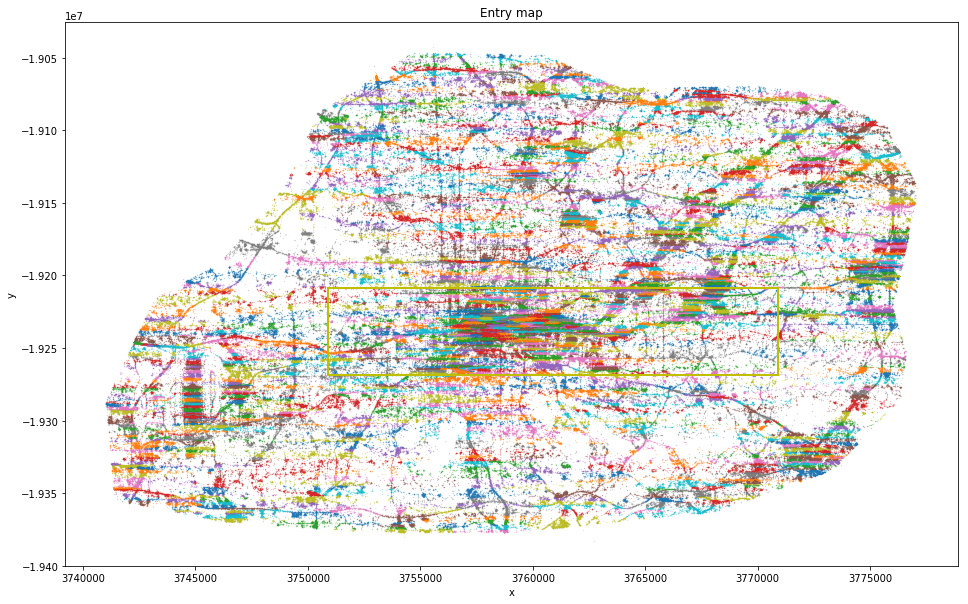

In [6]:
data=train[['x_entry','y_entry']]

train_c=kmeans.predict(data)
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in range(clusters):
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


Computing label assignment and total inertia


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


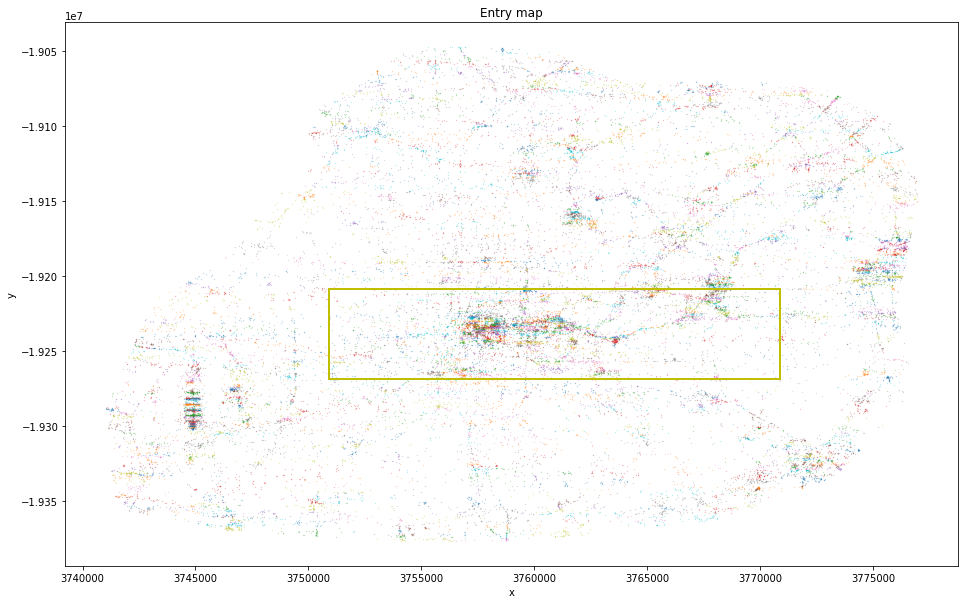

In [7]:
data=test2[['x_entry','y_entry']]


test2_c=kmeans.predict(data)
data['c']=test2_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)



# Plot
for c in range(clusters):
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


In [8]:
import lightgbm as lgb

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.02,
    'num_leaves' : 76,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss'
}

pred = pd.DataFrame({'c':test2_c,'target':test2_c})

for c in range(clusters):
    xc_train=x_train[train_c==c]
    yc_train=y_train[train_c==c].y.values
    xc_test=x_test[test2_c==c]
    
    
    d_train = lgb.Dataset(xc_train, label=yc_train)
    clf = lgb.train(params, d_train)
    #Prediction
    target=list(clf.predict(xc_test))
    
    def add(row,c):
        if row['c']==c:
            return target.pop(0)
        else:
            return row.target
        
    pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
    print('done:',c)
city_lgbm=pred.target.values    
pred[:20]   

done: 0
done: 1
done: 2
done: 3
done: 4
done: 5
done: 6
done: 7
done: 8
done: 9
done: 10
done: 11
done: 12
done: 13
done: 14
done: 15
done: 16
done: 17
done: 18
done: 19
done: 20
done: 21
done: 22
done: 23
done: 24
done: 25
done: 26
done: 27
done: 28
done: 29
done: 30
done: 31
done: 32
done: 33
done: 34
done: 35
done: 36
done: 37
done: 38
done: 39
done: 40
done: 41
done: 42
done: 43
done: 44
done: 45
done: 46
done: 47
done: 48
done: 49
done: 50
done: 51
done: 52
done: 53
done: 54
done: 55
done: 56
done: 57
done: 58
done: 59
done: 60
done: 61
done: 62
done: 63
done: 64
done: 65
done: 66
done: 67
done: 68
done: 69
done: 70
done: 71
done: 72
done: 73
done: 74
done: 75
done: 76
done: 77
done: 78
done: 79
done: 80
done: 81
done: 82
done: 83
done: 84
done: 85
done: 86
done: 87
done: 88
done: 89
done: 90
done: 91
done: 92
done: 93
done: 94
done: 95
done: 96
done: 97
done: 98
done: 99
done: 100
done: 101
done: 102
done: 103
done: 104
done: 105
done: 106
done: 107
done: 108
done: 109
done: 110


done: 831
done: 832
done: 833
done: 834
done: 835
done: 836
done: 837
done: 838
done: 839
done: 840
done: 841
done: 842
done: 843
done: 844
done: 845
done: 846
done: 847
done: 848
done: 849
done: 850
done: 851
done: 852
done: 853
done: 854
done: 855
done: 856
done: 857
done: 858
done: 859
done: 860
done: 861
done: 862
done: 863
done: 864
done: 865
done: 866
done: 867
done: 868
done: 869
done: 870
done: 871
done: 872
done: 873
done: 874
done: 875
done: 876
done: 877
done: 878
done: 879
done: 880
done: 881
done: 882
done: 883
done: 884
done: 885
done: 886
done: 887
done: 888
done: 889
done: 890
done: 891
done: 892
done: 893
done: 894
done: 895
done: 896
done: 897
done: 898
done: 899
done: 900
done: 901
done: 902
done: 903
done: 904
done: 905
done: 906
done: 907
done: 908
done: 909
done: 910
done: 911
done: 912
done: 913
done: 914
done: 915
done: 916
done: 917
done: 918
done: 919
done: 920
done: 921
done: 922
done: 923
done: 924
done: 925
done: 926
done: 927
done: 928
done: 929
done: 930


ValueError: Input data must be 2 dimensional and non empty.

In [ ]:

X = test2['x_entry'].values 
Y = test2['y_entry'].values

def score(x):
    if x>0.5:
        return 1
    else:
        return 0
    
city1 = [within_measure(x, y) for x,y in zip(X,Y)]
city2 = [score(x) for x in city_lgbm]
city2

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)



leg=['Outside','City']
# Plot
for data in [train[y_train.y.values==0],train[y_train.y.values==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Ractangle on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city2

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

In [ ]:
submission= pd.DataFrame()
trajectory_id = test2['trajectory_id']
submission['id']=trajectory_id 
submission['target'] = city2
submission.to_csv('./output/submission_cluster2.csv',index=False)    
submission[:20]